# Chrun Analysis CIA-2 
## Name: Hardik Shah<br>Registration Number: 2241131<br>Class: 6 BCA B

## **Dataset Description:**
### This dataset provides a comprehensive overview of customer churn in the life insurance sector, containing 1001 records with 11 features. Each entry represents a unique customer with attributes such as:
1. **Customer Name:** The name of the policyholder.
2. **Customer_Address:** Address of the customer.
3. **Company Name:** The name of the insurance company.
4. **Claim Reason:** Reason for filing a claim (e.g., Travel, Medical, Phone).
5. **Data confidentiality:** The level of confidentiality associated with the data (Low, Medium, High).
6. **Claim Amount:** The monetary value of the claim.
7. **Category Premium:** The premium category amount for the policy.
8. **Premium Ratio:** The ratio of the claim amount to the premium amount.
9. **Claim Request output:** Indicates whether a claim request was approved or denied (Yes/No).
10. **BMI:** Body Mass Index of the policyholder.
11. **Churn:** Indicates if the customer has churned (Yes/No).

### The key target variable, "Churn", identifies whether a customer has left the insurance service. This dataset enables detailed exploration of churn drivers by analyzing customer behavior, claim history, premium relationships, and data confidentiality, offering a rich ground for predictive modeling, customer retention strategies, and policy optimization in the life insurance domain.

## Importing all necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler, label_binarize
import warnings
warnings.filterwarnings("ignore")

## Performing Basic EDA To Get An Idea About The Dataset.

In [3]:
df=pd.read_csv("Churn.csv")
df.head(5)

Customer Name                                   Customer_Address  \
0  Christine Payne  7627 Anderson Rest Apt. 265,Lake Heather, DC 3...   
1   Tony Fernandez  3953 Cindy Brook Apt. 147,East Lindatown, TN 4...   
2  Christopher Kim        8693 Walters Mountains,South Tony, TX 88407   
3     Nicole Allen           56926 Webster Coves,Shawnmouth, NV 04853   
4       Linda Cruz      489 Thomas Forges Apt. 305,Jesseton, GA 36765   

                    Company Name Claim Reason Data confidentiality  \
0  Williams, Henderson and Perez       Travel                  Low   
1                  Moore-Goodwin      Medical                 High   
2                   Smith-Holmes        Phone               Medium   
3                  Harrell-Perez        Phone               Medium   
4     Simpson, Kramer and Hughes        Phone               Medium   

   Claim Amount  Category Premium  Premium Ratio Claim Request output   BMI  \
0         377.0            4794.0       0.078640                   No  21.0   
1        1440.0           14390.0       0.100069                   No  24.0   
2         256.0            1875.0       0.136533                   No   NaN   
3         233.0            1875.0       0.124267                   No  24.0   
4         239.0            1875.0       0.127467                   No  21.0   

  Churn  
0   Yes  
1   Yes  
2   Yes  
3   Yes  
4   Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Name         836 non-null    object 
 1   Customer_Address      816 non-null    object 
 2   Company Name          992 non-null    object 
 3   Claim Reason          987 non-null    object 
 4   Data confidentiality  985 non-null    object 
 5   Claim Amount          993 non-null    float64
 6   Category Premium      997 non-null    float64
 7   Premium Ratio         992 non-null    float64
 8   Claim Request output  995 non-null    object 
 9   BMI                   990 non-null    float64
 10  Churn                 988 non-null    object 
dtypes: float64(4), object(7)
memory usage: 86.2+ KB


In [5]:
df.describe()

Claim Amount  Category Premium  Premium Ratio         BMI
count    993.000000        997.000000     992.000000  990.000000
mean    1062.127895       8605.787362       0.123033   22.998990
std      790.528469       6127.379460       0.033805    3.196149
min        2.000000        399.000000       0.005013   18.000000
25%      236.000000       1875.000000       0.105534   20.000000
50%     1340.000000      14390.000000       0.123037   23.000000
75%     1786.000000      14390.000000       0.141835   26.000000
max     2299.000000      14390.000000       0.248120   28.000000

## Removing Irrelevant Columns

### Removing columns like " Customer Name", "Customer_Address" and "Company Name" as they are not relevant to our analysis.

In [6]:
df=df.drop(['Customer Name','Customer_Address', 'Company Name','BMI'],axis=1)
df.columns

Index(['Claim Reason', 'Data confidentiality', 'Claim Amount',
       'Category Premium', 'Premium Ratio', 'Claim Request output', 'Churn'],
      dtype='object')

#### The BMI column is being removed as it is highly corelated to the target variable which will through off the ML analysis.<br>

## Checking for any duplicate rows in the dataset and discarding them if any.

In [7]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (177, 7)


### There are no duplicate rows in the dataset. <br><br>

## Checking for Null values in Dataset and Removing it


In [8]:
print(df.isnull().sum())

Claim Reason            14
Data confidentiality    16
Claim Amount             8
Category Premium         4
Premium Ratio            9
Claim Request output     6
Churn                   13
dtype: int64


In [9]:
df = df.dropna()
print(df.isnull().sum())
print("\n\nTotal Record: ",len(df))

Claim Reason            0
Data confidentiality    0
Claim Amount            0
Category Premium        0
Premium Ratio           0
Claim Request output    0
Churn                   0
dtype: int64


Total Record:  936


### All Null columns have been removed to make the analysis easier.<br>We are still left with 932 records.<br><br>

## Renaming Target Column For Easier Understandibility.

In [10]:
df = df.rename(columns = {"Churn" : "Target"})
df.columns

Index(['Claim Reason', 'Data confidentiality', 'Claim Amount',
       'Category Premium', 'Premium Ratio', 'Claim Request output', 'Target'],
      dtype='object')

## Detecting & Handling Outliers in The Dataset

<Axes: xlabel='Premium Ratio'>

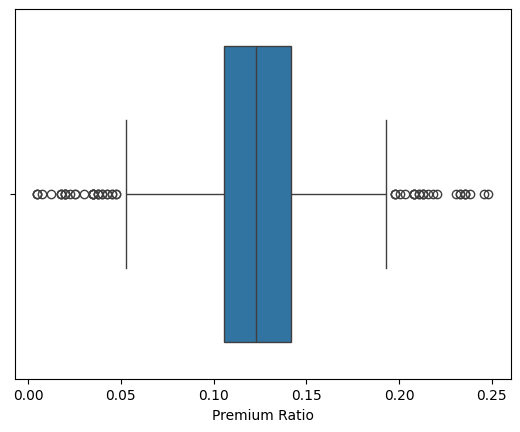

In [11]:
sns.boxplot(x=df['Premium Ratio'])

### There are multiple outliers in the column "Premium Ratio". Hence we need to get rid of all the outliers for a proper result.

In [12]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [13]:
 df = remove_outliers(df, "Premium Ratio")
 df = remove_outliers(df, "Premium Ratio")

<Axes: xlabel='Premium Ratio'>

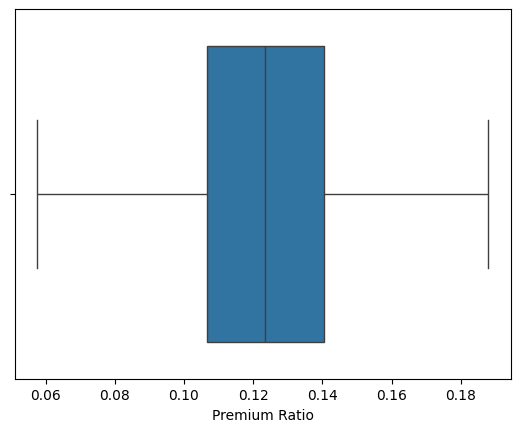

In [14]:
sns.boxplot(x=df['Premium Ratio'])

### As per the Box Plot, we can see that there are no outliers left for the column "Premium Ratio".<br>

In [15]:
df.head()

Claim Reason Data confidentiality  Claim Amount  Category Premium  \
0       Travel                  Low         377.0            4794.0   
1      Medical                 High        1440.0           14390.0   
2        Phone               Medium         256.0            1875.0   
3        Phone               Medium         233.0            1875.0   
4        Phone               Medium         239.0            1875.0   

   Premium Ratio Claim Request output Target  
0       0.078640                   No    Yes  
1       0.100069                   No    Yes  
2       0.136533                   No    Yes  
3       0.124267                   No    Yes  
4       0.127467                   No    Yes

## Swarm Plot

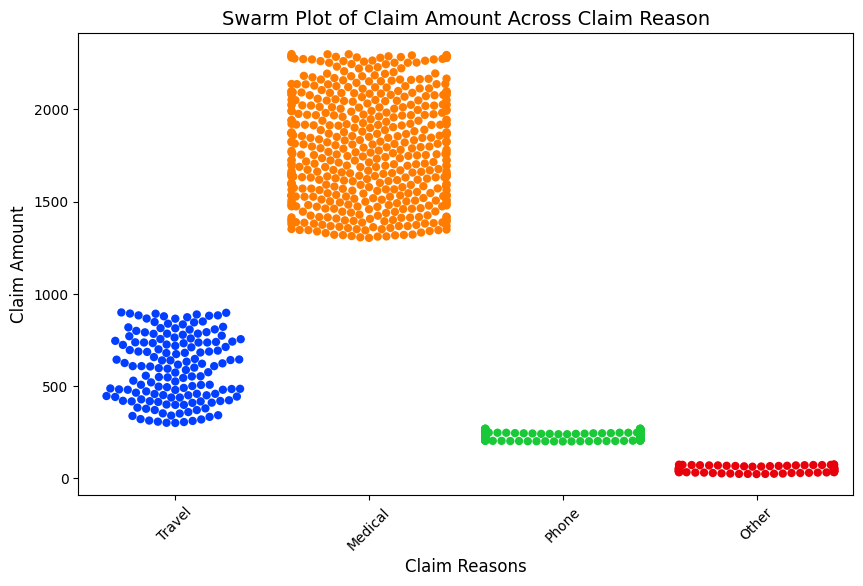

In [16]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Claim Reason', y='Claim Amount', palette='bright', size=6)
plt.title('Swarm Plot of Claim Amount Across Claim Reason', fontsize=14)
plt.xlabel('Claim Reasons', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Interpretation:
#### 1. Medical claims have the highest variability and the largest claim amounts, making it the most expensive category. Medical claims might require more rigorous risk management or higher premiums due to the higher payout amounts.
#### 2. Travel claims exhibit a mid-range cost pattern but are more varied than Phone or Other claims. Travel insurance claims are variable but generally more moderate compared to medical claims.
#### 3. Phone and Other claims are associated with consistently low claim amounts. Phone and other categories could represent minimal risk with relatively predictable, low-cost claims.<br><br>

## Voilin Plot

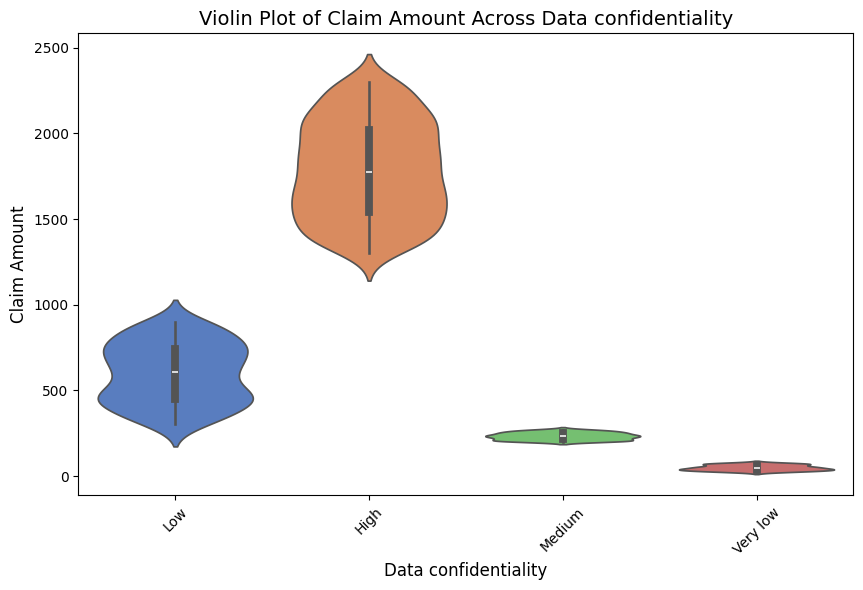

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Data confidentiality', y='Claim Amount', palette='muted')
plt.title('Violin Plot of Claim Amount Across Data confidentiality', fontsize=14)
plt.xlabel('Data confidentiality', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Count Plot

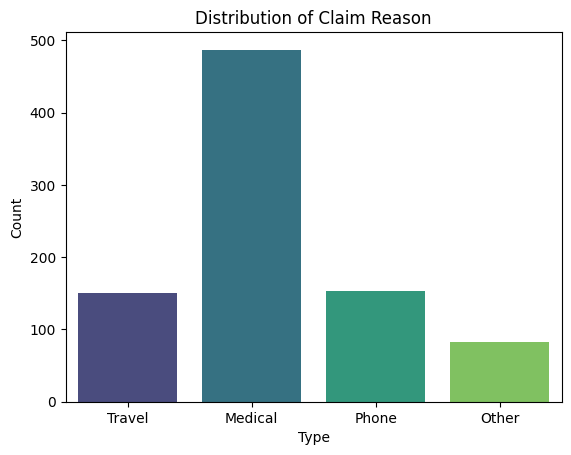

In [18]:
sns.countplot(data=df, x='Claim Reason', palette='viridis')
plt.title('Distribution of Claim Reason')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Interpretation:
#### 1. Medical claims dominate in terms of count with the highest frequency (close to 500 claims), consistent with their high claim amounts observed in the swarm plot. This indicates that medical claims are not only the most expensive but also the most frequent.  
#### 2. Travel and Phone claims are moderately frequent, suggesting a balanced volume, likely corresponding to mid-range or low-cost claims.

## Pair Plot

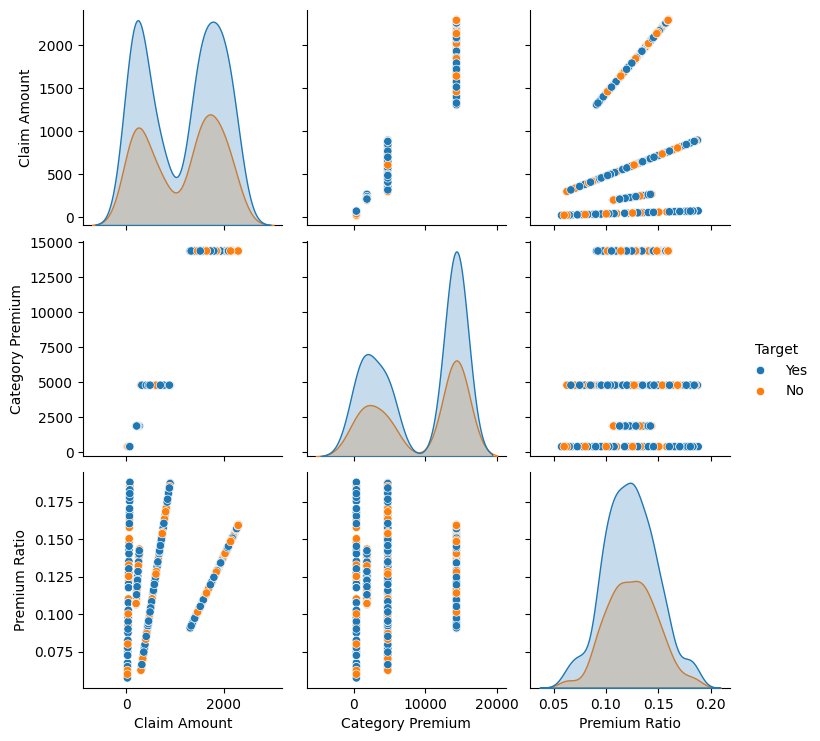

In [19]:
sns.pairplot(data=df,hue='Target')
plt.show()

## Interpretation:
#### The diagonal KDE plots show a bimodal distribution for claim amounts & a skewed distribution for premiums. Scatter plots reveal a positive correlation between category premium and claim amount, while other pairs. Color-coded points highlight the target classification, showing potential stratification in BMI and premium-related plots. These patterns suggest that higher premiums are linked to larger claims, and claim segmentation by premium size or BMI could improve risk management strategies.

## <br>Performing Encoding

### __Label Encoding__ has been performed for the column " Data confidentiality" as it contains ordinal values and label encoding is best suited for ordinal values.

In [20]:
confidentiality_mapping = {
    'High': 3,
    'Medium': 2,
    'Low': 1,
    'Very low': 0
}

df['Data confidentiality'] = df['Data confidentiality'].map(confidentiality_mapping)

print("Encoded Data confidentiality unique values:", df['Data confidentiality'].unique(),"\n\n")

Encoded Data confidentiality unique values: [1 3 2 0] 




### **One-Hot Encoding** has been performed for the columns "Claim Reason" & "Claim Request output" as they contain Nominal values and One-Hot encoding best suits Nominal values.

In [21]:
df = pd.get_dummies(df, columns=['Claim Reason'], prefix='Claim_Reason')
df = pd.get_dummies(df, columns=['Claim Request output'], prefix='Claim Request output')
df.head()

Data confidentiality  Claim Amount  Category Premium  Premium Ratio Target  \
0                     1         377.0            4794.0       0.078640    Yes   
1                     3        1440.0           14390.0       0.100069    Yes   
2                     2         256.0            1875.0       0.136533    Yes   
3                     2         233.0            1875.0       0.124267    Yes   
4                     2         239.0            1875.0       0.127467    Yes   

   Claim_Reason_Medical  Claim_Reason_Other  Claim_Reason_Phone  \
0                 False               False               False   
1                  True               False               False   
2                 False               False                True   
3                 False               False                True   
4                 False               False                True   

   Claim_Reason_Travel  Claim Request output_No  Claim Request output_Yes  
0                 True                     True                     False  
1                False                     True                     False  
2                False                     True                     False  
3                False                     True                     False  
4                False                     True                     False

### **Binary Encoding** has been performed for the Target Variable; "Target"(Churn).

In [22]:
target_mapping = {'Yes': 1, 'No': 0}
df['Target'] = df['Target'].map(target_mapping)

print("Target: \n",df['Target'],"\n\n")

Target: 
 0       1
1       1
2       1
3       1
4       1
       ..
996     1
997     0
998     1
999     1
1000    1
Name: Target, Length: 874, dtype: int64 




### Heatmap 

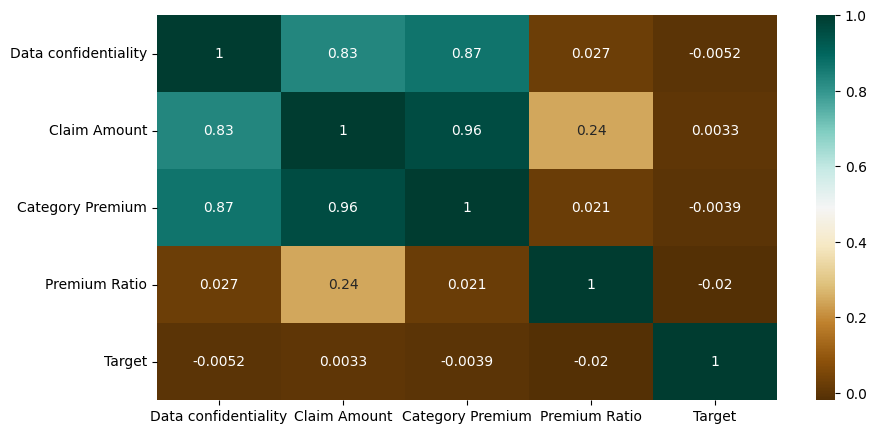

In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

## Interpretation:
#### 1. Category Premium and Claim Amount have a very high positive correlation (0.96), indicating that higher premiums are strongly associated with higher claim amounts.
#### 2. Data Confidentiality highly correlates with Category Premium (0.88) and Claim Amount (0.85), suggesting that these variables might increase together.
#### 3. The strong correlation between Claim Amount and Category Premium suggests potential multicollinearity, which could affect certain models like linear regression. Feature selection or dimensionality reduction techniques may be necessary.

## Scaling The values for better results:

In [24]:
scaler = StandardScaler()

numeric_columns = ['Claim Amount', 'Category Premium', 'Premium Ratio', 'Data confidentiality']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

Data confidentiality  Claim Amount  Category Premium  Premium Ratio  \
0             -1.153693     -0.997633         -0.745695      -1.825774   
1              0.777969      0.386542          0.873750      -0.958353   
2             -0.187862     -1.155192         -1.238312       0.517625   
3             -0.187862     -1.185141         -1.238312       0.021097   
4             -0.187862     -1.177329         -1.238312       0.150626   

   Target  Claim_Reason_Medical  Claim_Reason_Other  Claim_Reason_Phone  \
0       1                 False               False               False   
1       1                  True               False               False   
2       1                 False               False                True   
3       1                 False               False                True   
4       1                 False               False                True   

   Claim_Reason_Travel  Claim Request output_No  Claim Request output_Yes  
0                 True                     True                     False  
1                False                     True                     False  
2                False                     True                     False  
3                False                     True                     False  
4                False                     True                     False

# ML Analysis

### Spliting the dataset into Dependent and Independent Variables

In [25]:
x = df.drop('Target', axis=1)
y = df["Target"]

### Split the value to train and test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.20, random_state=38, stratify = y)

## 1. KNN Analysis

### Error Rate Plot

Text(0, 0.5, 'Error Rate')

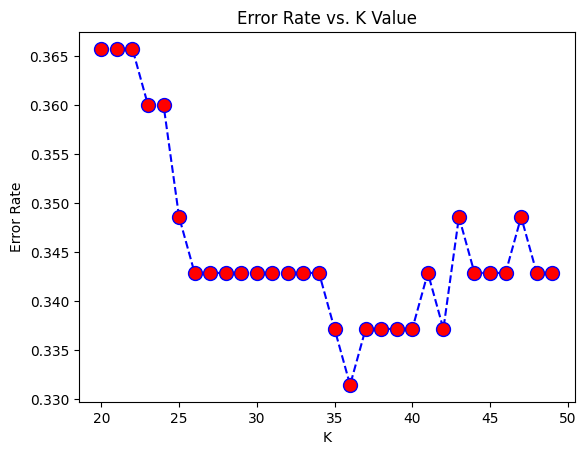

In [27]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(20,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.plot(range(20,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### As the error rate is the lowest when k=36 we will create a model with the same values.
#### Here we perform KNN with k=36

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 36)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=36)

In [29]:
prediction_knn = knn.predict(X_test)
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


              precision    recall  f1-score   support

           0       1.00      0.03      0.06        60
           1       0.66      1.00      0.80       115

    accuracy                           0.67       175
   macro avg       0.83      0.52      0.43       175
weighted avg       0.78      0.67      0.55       175

Accuracy:  0.6685714285714286


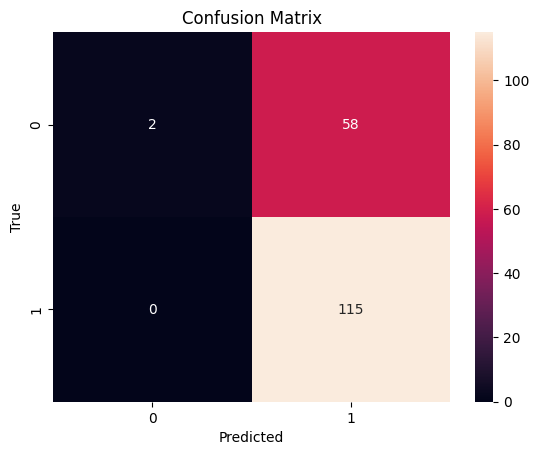

In [30]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

### ROC Curve

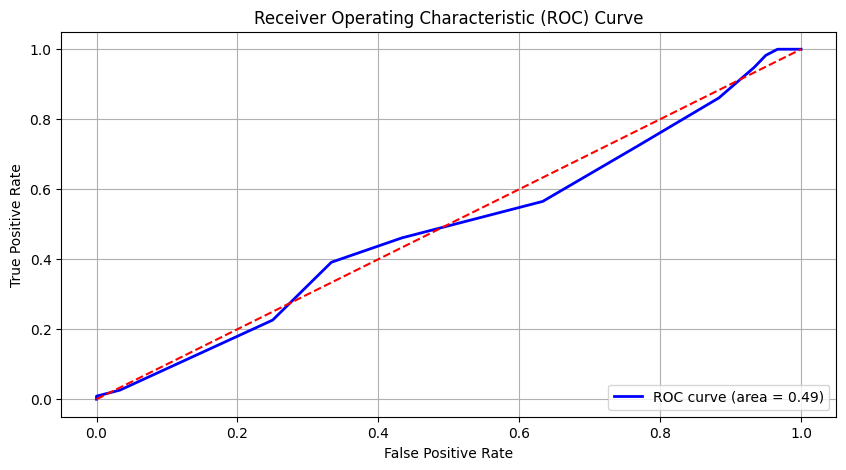

In [31]:
y_probs = knn.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Scatter Plot For KNN

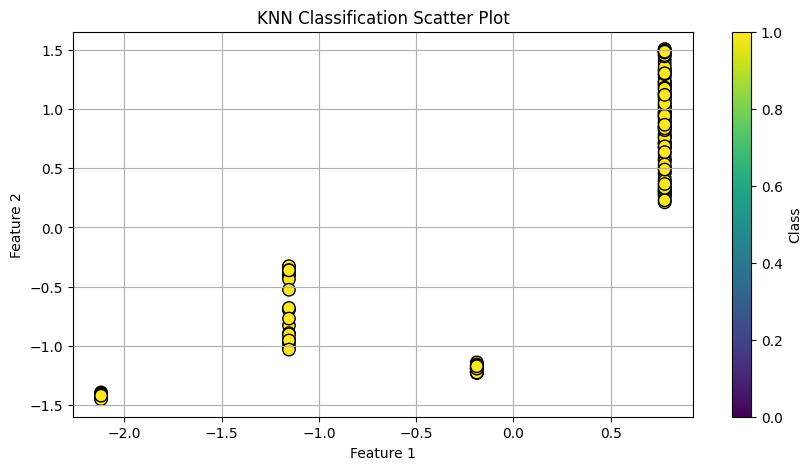

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=prediction_knn, cmap='viridis', edgecolor='k', s=80)
plt.title('KNN Classification Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

## Interpretation:
### Class 0 (Negative Class)
#### 1. Precision (1.00): The model predicted class 0 perfectly when it did, but this does not account for the fact that it rarely predicted class 0.
#### 2. Recall (0.03): Only 3% of actual class 0 instances were correctly predicted as class 0. This indicates poor sensitivity for this class.
#### 3. F1-score (0.06): A low F1-score (harmonic mean of precision and recall) reflects poor performance for class 0 due to very low recall.<br>
### Class 1 (Positive Class)
#### 1. Precision (0.66): When the model predicted class 1, 66% of those predictions were correct.
#### 2. Recall (1.00): The model identified all class 1 instances correctly.
#### 3. F1-score (0.80): A relatively high F1-score due to perfect recall.<br>

## <br>2. Decision Tree Analysis

In [33]:
def enhanced_decision_tree(X, y):
    # Encode target labels if needed
    if y.dtype == 'object' or y.dtype == 'category':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(y)

    y_binarized = label_binarize(y, classes=np.unique(y))
    n_classes = y_binarized.shape[1]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    results = {}

    # Models to evaluate
    models = {
        "Gini": DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=10, random_state=42),
        "Entropy": DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=10, random_state=42),
    }


    for model_name, model in models.items():
        print(f"\n--- Decision Tree using {model_name} Criterion ---")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[f"Decision Tree ({model_name})"] = acc

        # Performance Metrics
        print(f"Accuracy: {acc}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F-Score: {fscore:.2f}")

        importance = model.feature_importances_
        for name, imp in zip(X.columns, importance):
            print(f"{name}: {imp}")


        # ROC Curve
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
        plt.title(f"ROC Curve for Decision Tree ({model_name})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

        # Visualize the Tree
        plt.figure(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=10)
        plt.title(f"Decision Tree Visualization ({model_name})")
        plt.show()


--- Decision Tree using Gini Criterion ---
Accuracy: 0.6628571428571428
Confusion Matrix:
 [[  3  57]
 [  2 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.05      0.09        60
           1       0.66      0.98      0.79       115

    accuracy                           0.66       175
   macro avg       0.63      0.52      0.44       175
weighted avg       0.64      0.66      0.55       175

Precision: 0.64, Recall: 0.66, F-Score: 0.55
Data confidentiality: 0.0
Claim Amount: 0.7120468729220022
Category Premium: 0.0
Premium Ratio: 0.28795312707799786
Claim_Reason_Medical: 0.0
Claim_Reason_Other: 0.0
Claim_Reason_Phone: 0.0
Claim_Reason_Travel: 0.0
Claim Request output_No: 0.0
Claim Request output_Yes: 0.0


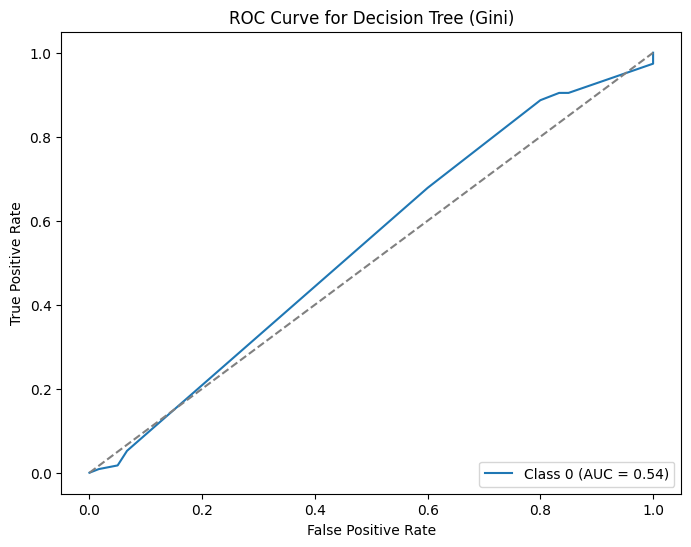

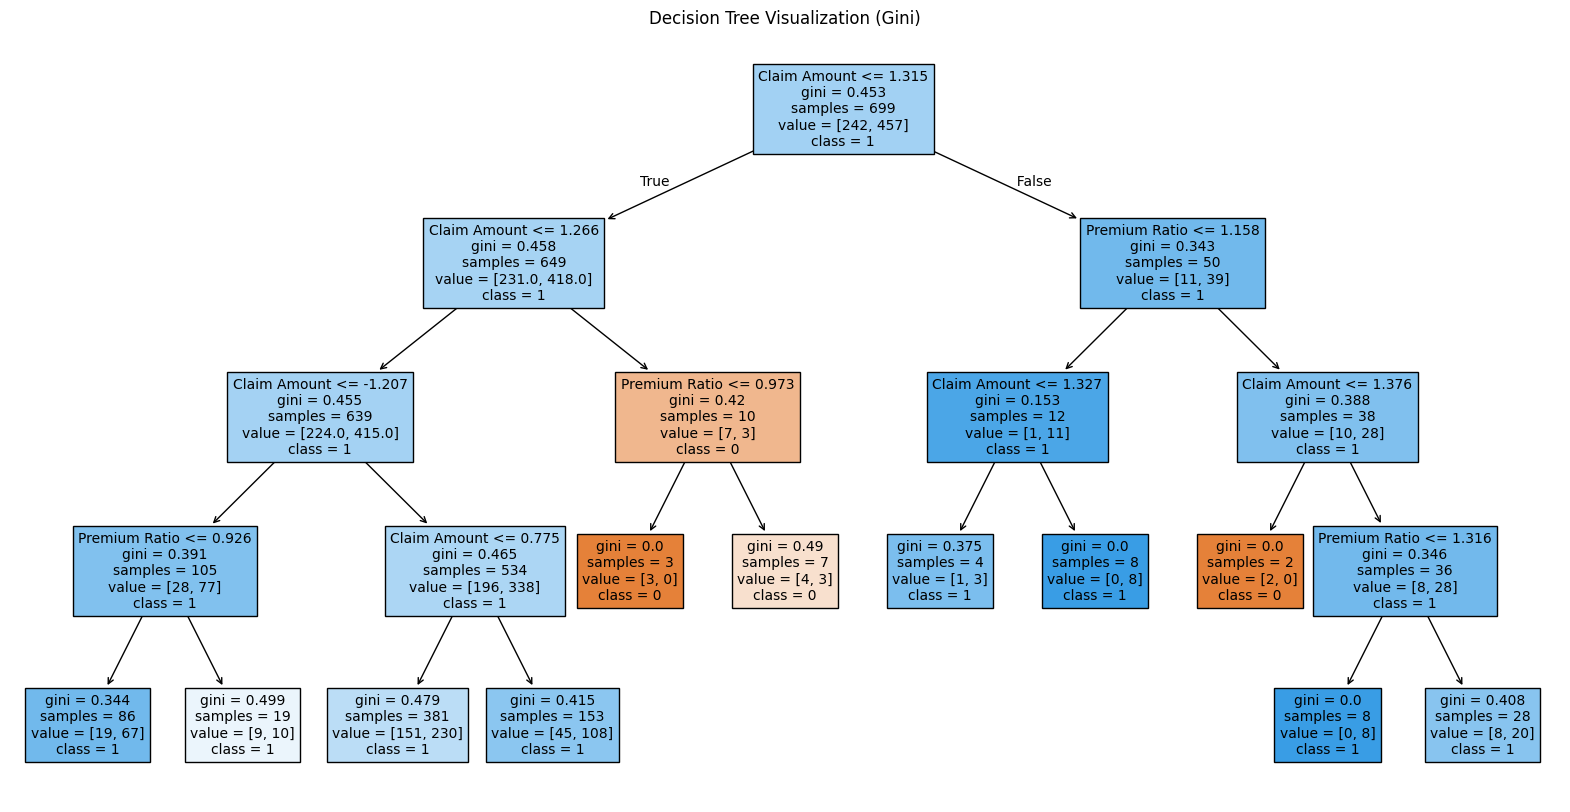


--- Decision Tree using Entropy Criterion ---
Accuracy: 0.6628571428571428
Confusion Matrix:
 [[  3  57]
 [  2 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.05      0.09        60
           1       0.66      0.98      0.79       115

    accuracy                           0.66       175
   macro avg       0.63      0.52      0.44       175
weighted avg       0.64      0.66      0.55       175

Precision: 0.64, Recall: 0.66, F-Score: 0.55
Data confidentiality: 0.0
Claim Amount: 0.8701522248800773
Category Premium: 0.0
Premium Ratio: 0.12984777511992268
Claim_Reason_Medical: 0.0
Claim_Reason_Other: 0.0
Claim_Reason_Phone: 0.0
Claim_Reason_Travel: 0.0
Claim Request output_No: 0.0
Claim Request output_Yes: 0.0


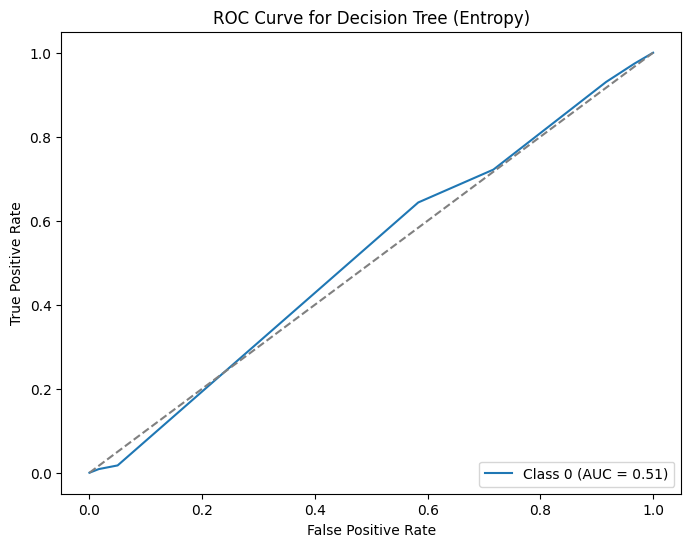

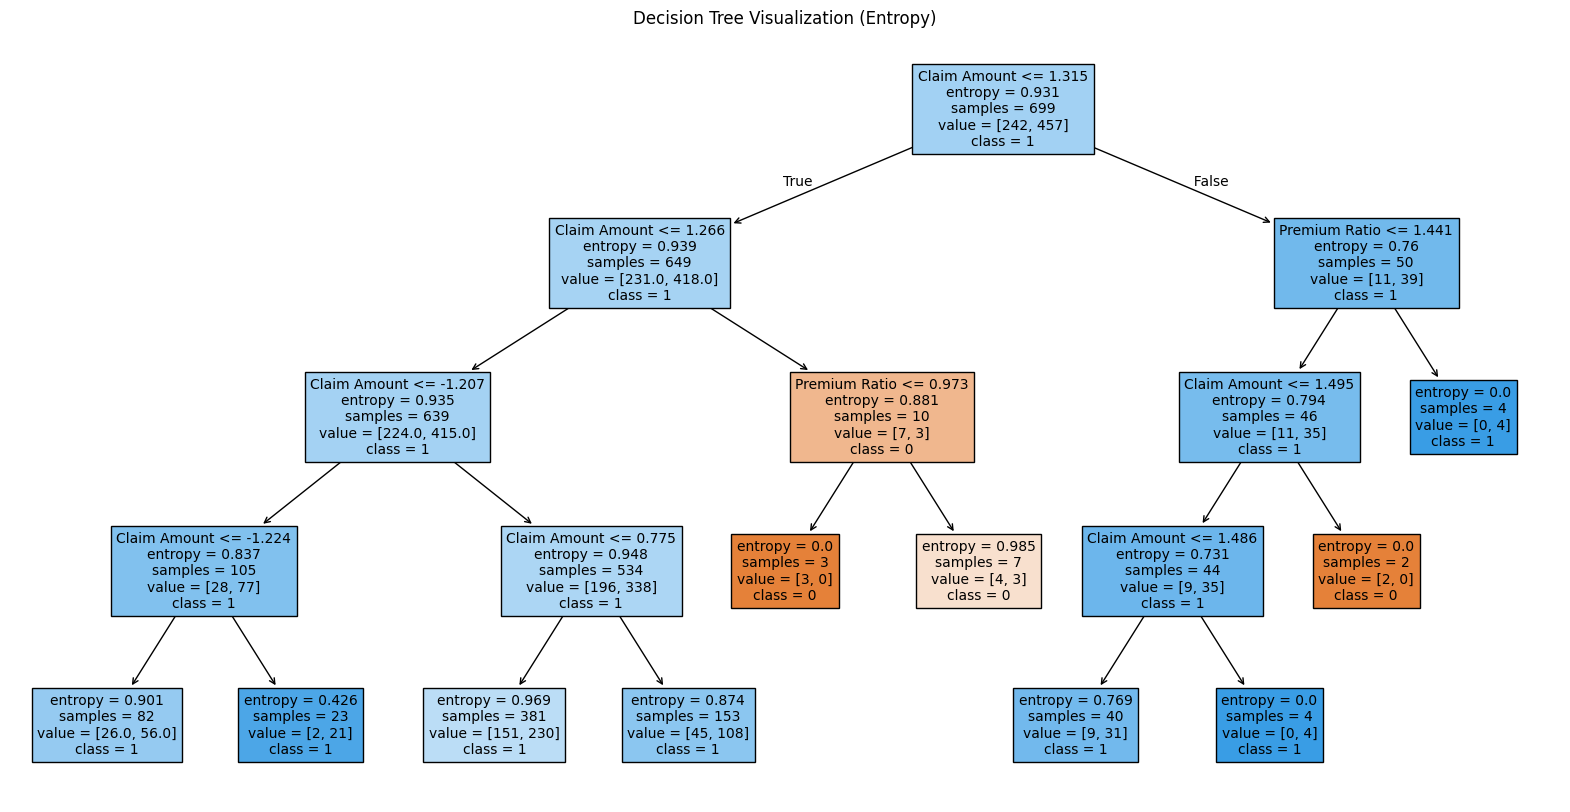

In [34]:
enhanced_decision_tree(x,y)

## Interpretation
#### The decision tree classifiers using Gini and Entropy achieved moderate accuracy (66.29%) but showed significant bias toward Class 1 (Positive). Both models had poor performance for Class 0 (Negative), with low recall (5%) and F1-scores (0.09), while Class 1 achieved high recall (98%) and a stronger F1-score (0.79). The AUC scores (Gini: 0.54, Entropy: 0.51) indicate weak discriminatory power, performing slightly better than random guessing. The dominant feature in both models is **Claim Amount**, followed by **Premium Ratio**, while other features contributed minimally. Overall, the models require improvement through balanced data, advanced algorithms, feature engineering, and hyperparameter tuning to enhance performance, especially for Class 0.

## Comparative Analysis

## 1. Overall Accuracy:
    KNN: 66.86%
    Decision Tree: 66.29% (for both Gini and Entropy)
    Both models achieve similar accuracy, indicating that they are moderately effective overall. However, accuracy alone can be misleading due to the class imbalance.

## 2. Class-Level Performance:
### *Class 0 (Negative Class):*

### *KNN:*
    Precision: 1.00 (high precision because there are no false positives for Class 0)
    Recall: 0.03 (very poor at identifying true negatives)
    F1-score: 0.06
    Decision Tree:
    Precision: 0.60
    Recall: 0.05
    F1-score: 0.09
    
### Comparison: KNN achieves perfect precision for Class 0, but its recall is extremely low (only 3% of actual negatives are correctly identified). Decision Tree has a slightly better recall (5%) but sacrifices precision, leading to marginally better F1-scores for Class 0.

### *Class 1 (Positive Class):*

### *KNN:*
    Precision: 0.66
    Recall: 1.00
    F1-score: 0.80
    Decision Tree:
    Precision: 0.66
    Recall: 0.98
    F1-score: 0.79
### Comparison: Both models perform well for Class 1, with high recall and F1 scores. KNN achieves slightly better recall (perfect at 100%) than the Decision Tree but performs almost identically in other metrics.

### *3. Macro Averages:*
    KNN: Precision: 0.83, Recall: 0.52, F1-score: 0.43
    Decision Tree: Precision: 0.63, Recall: 0.52, F1-score: 0.44
    Comparison: KNN has higher macro-average precision (due to perfect precision for Class 0), but both models exhibit similarly low recall and F1 Scores, reflecting a poor overall balance between the classes.

### *4. Feature Importance:*
    KNN: Non-parametric, so feature importance isn't directly available.
    Decision Tree:
    Dominant Feature: Claim Amount (71.20% for Gini, 87.01% for Entropy).
    Secondary Feature: Premium Ratio (28.80% for Gini, 12.98% for Entropy).
    Comparison: The Decision Tree models emphasize the importance of Claim Amount as the dominant predictor, while KNN does not offer insights into feature importance.

### *5. ROC-AUC Scores:*
    KNN: 0.49 (near random guessing).
    Decision Tree:
    Gini: 0.54
    Entropy: 0.51
### Comparison: Both models have weak discriminatory power, with scores close to 0.5, indicating that neither is reliably separating the classes.


## Conclusion:
### In conclusion, both the KNN and Decision Tree models demonstrate moderate overall accuracy but are heavily biased toward Class 1 (Positive), as evidenced by high recall and F1-scores for this class, while severely underperforming for Class 0 (Negative). KNN slightly edges out in Class 1 recall, achieving perfect identification of positives, but fails to generalize well for negatives. The Decision Tree offers the advantage of interpretability, highlighting the dominance of "Claim Amount" and "Premium Ratio" as key features, though its discriminatory power remains weak (AUC close to 0.5). To improve performance, particularly for Class 0, it is essential to address the class imbalance through data rebalancing techniques, advanced algorithms, and hyperparameter tuning. While the current results provide a starting point, further refinement and exploration of ensemble methods or more sophisticated classifiers are recommended to achieve better-balanced and reliable outcomes.